In [1]:
from laserhockey_main import main
#from debug_env_main import main
import pylab as plt
import numpy as np
#import laserhockey.hockey_env as h_env

In [2]:
def running_mean(x, N):
    return np.convolve(x, np.ones(N)/N, mode='valid')

In [3]:
env, m3ddpg = main()

In [20]:
rewards = m3ddpg.train(200000)

100%|██████████████████████████████████████████████████████████████████████████| 200000/200000 [42:42<00:00, 78.04it/s]


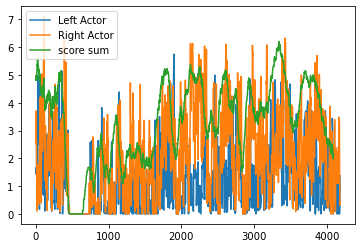

In [21]:
plt.close()
plt.plot(running_mean(rewards[:,0],10), label="Left Actor")
plt.plot(running_mean(rewards[:,1],10), label="Right Actor")
plt.plot(running_mean(np.array(rewards).sum(axis=1),100), label="score sum")
plt.legend()

In [22]:
actor_left = m3ddpg.get_policy(0)
actor_right = m3ddpg.get_policy(1)

In [23]:
for _ in range(10):
    state, obs = env.reset()
    for _ in range(250):
        action1 = actor_left(obs[0])
        action2 = actor_right(obs[1])
        state, obs, r, d, info = env.step(np.hstack([action1,action2]))
        env.render()
        if d: break
env.close()

In [9]:
obs[0]

-2.0

In [9]:
actor_left(np.array(1.))

RuntimeError: both arguments to matmul need to be at least 1D, but they are 0D and 2D